C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9375
[1]
この画像はいちごです


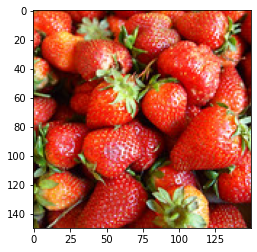

In [1]:
from PIL import Image
import numpy as np
import glob

#画像を読み個でデータとラベルに追加する。
data = []
target = []

def glob_images(dir , label , size):
    files = glob.glob(dir + "/*jpg")
    
    for f in files:
        img = Image.open(f)#画像を開く
        #img = img.convert("RBG")#RBG画質に変換
        img.thumbnail((size , size) , Image.LANCZOS)#サイズ変換方法を指定してリサイズ
        ary = np.array(img).reshape(-1,)#1次元の配列にする
        data.append(ary)#データに追加
        target.append(label)#ラベルに追加
        
#画像ディレクトリとラベル、画像サイズを指定してデータを追加
glob_images("./lemon" , label=0 , size =16)
glob_images("./strawberry" , label = 1 , size = 16)



#---学習とモデルの構築,評価---

#学習とテストにデータを分割
from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(data , target) #標準でtrain75%、test25%に設定

#データを学習

from sklearn import svm
#モデルの読み込み
clf = svm.LinearSVC()

#学習
clf.fit(x_train , y_train)

#モデル評価
pred = clf.predict(x_test)
result = list(pred == y_test).count(True)/len(y_test)
#print("正解率=" + str(result))
print(result)




#----画像を読み込み判定させる---
#モデルの保存
import joblib
joblib.dump(clf , "fruit.pkl" , compress=True)

%matplotlib inline
from matplotlib import pylab as plt

#判定したい画像を読み込む
jpg_file = "11.jpg"

#画像を開いて表示させる
img = Image.open(jpg_file)
plt.imshow(img)

#リサイズ＆スケール
img.thumbnail((16,16) , Image.LANCZOS)


#numpy配列に変換
import numpy as np 

img_a = np.array(img , "f")
img_a = img_a.reshape(-1,)

#学習モデルを読み込んで判定
clf = joblib.load("fruit.pkl")
result = clf.predict([img_a])
print(result)
if result == 0:
    print("この画像は檸檬です")
else:
    print("この画像はいちごです")